In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import time
import datetime
from utils import *
from data_processing import *
today = datetime.date.today()


In [2]:
config = TsConf()
config.train_fids = [102]
config.test_fids = [202]

In [3]:
df = TsDataFrame(pd.read_csv(config.cmapss_url))
df.columns = config.columns_old
df = df[config.columns_new]
df = df.loc[df.FILEID == config.train_fids]

## Clustering dataset according to operational parameters

In [4]:
df = df.cluster(config)

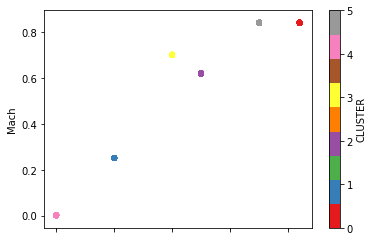

In [5]:
ax1 = df.plot.scatter(x='Alt', y='Mach', c='CLUSTER', colormap='Set1')

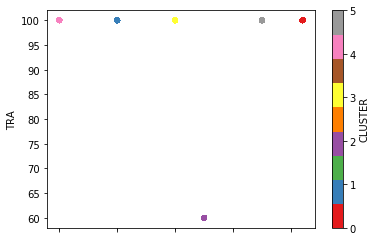

In [6]:
ax1 = df.plot.scatter(x='Alt', y='TRA', c='CLUSTER', colormap='Set1')

In [7]:
df = df.data_norm(config)

In [8]:
config.train_fids = [102]
config.test_fids = [202]

In [9]:
train = df[(["FILEID","ENGINEID", "TIMECYCLE", "CLUSTER"]+config.select_feat+["RUL"])][df.FILEID.isin(config.train_fids)]
test = df[(["FILEID","ENGINEID", "TIMECYCLE", "CLUSTER"]+config.select_feat+["RUL"])][df.FILEID.isin(config.test_fids)]    

In [10]:
print("df.shape: %s, train.shape: %s, test.shape: %s" % (str(df.shape), str(train.shape), str(test.shape)))

df.shape: (53759, 29), train.shape: (53759, 13), test.shape: (0, 13)


# Analysis of test data series length

Short series are usually provided for healthy engines

# Sensor data analysis for train data

In [11]:
df = train.copy()
config.ewm = 20
df = df.ewma(config)

In [12]:
df["REV_TIMECYCLE"] = df.groupby(["FILEID", "ENGINEID"])["TIMECYCLE"].transform(lambda x: max(x)-x)

In [13]:
mean_train = df.groupby(["FILEID", "REV_TIMECYCLE"]).agg(np.mean).reset_index()
std_train = df.groupby(["FILEID", "REV_TIMECYCLE"]).agg(np.std).reset_index()

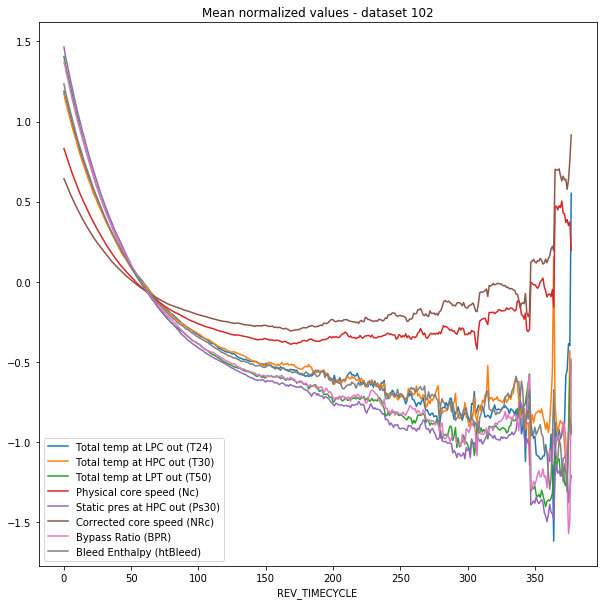

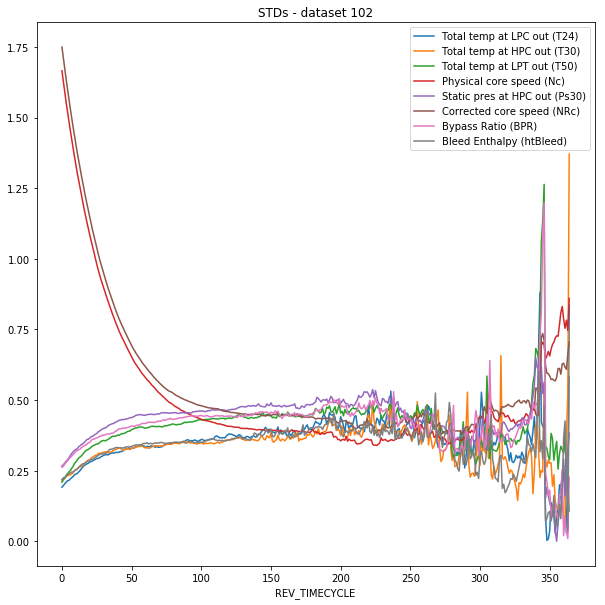

In [18]:
for file in config.train_fids:
        f1 = mean_train[(mean_train["FILEID"]==file)]
        f2 = std_train[(std_train["FILEID"]==file)]
        cols = (f1.std()>0.001)
        f1 = f1.loc[:,cols]
        
        f2 = f2.loc[:,cols]
        f1.plot(x='REV_TIMECYCLE', y=config.select_feat, figsize=(10,10), title = "Mean normalized values - dataset "+str(file)) 
        f2.plot(x='REV_TIMECYCLE', y=config.select_feat, figsize=(10,10), title = "STDs - dataset "+str(file)) 

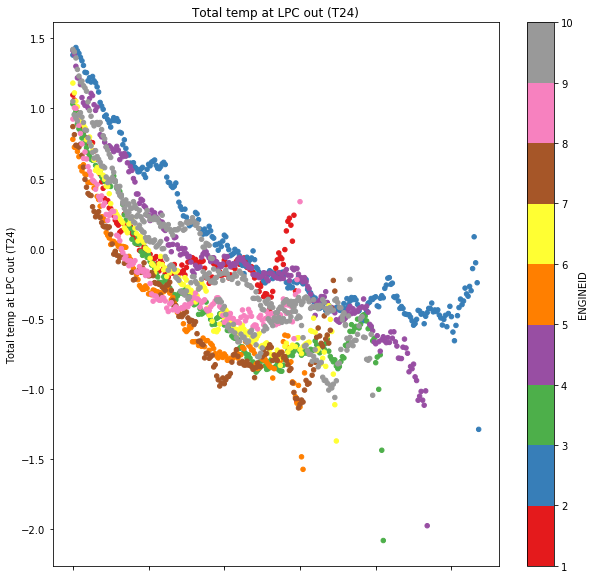

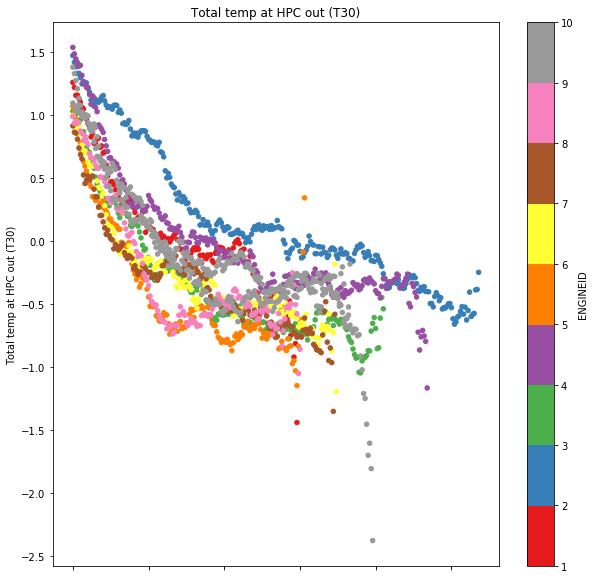

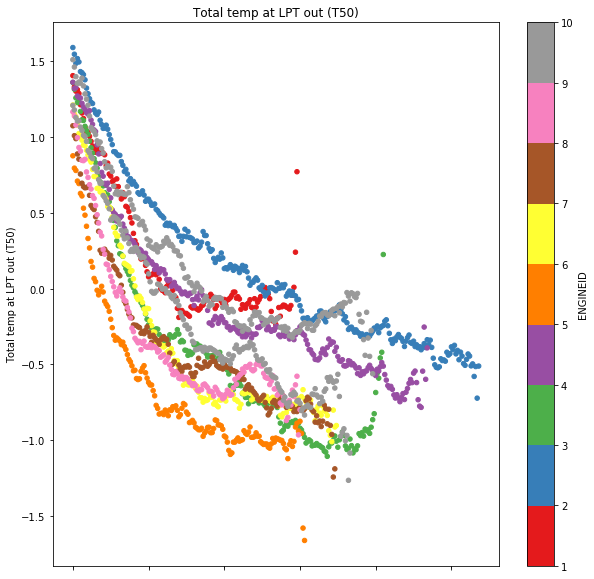

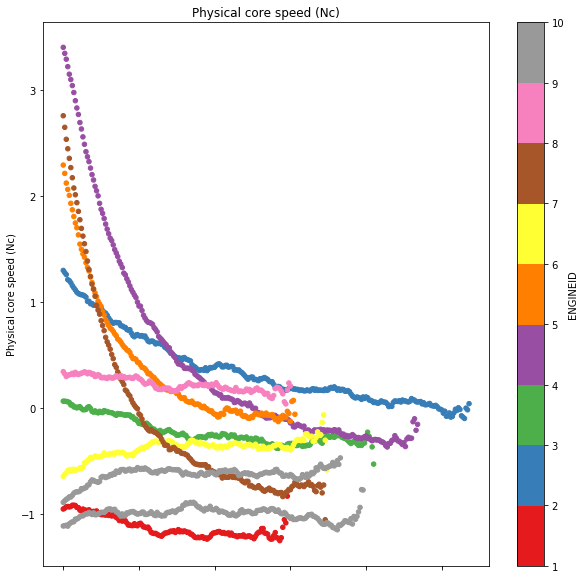

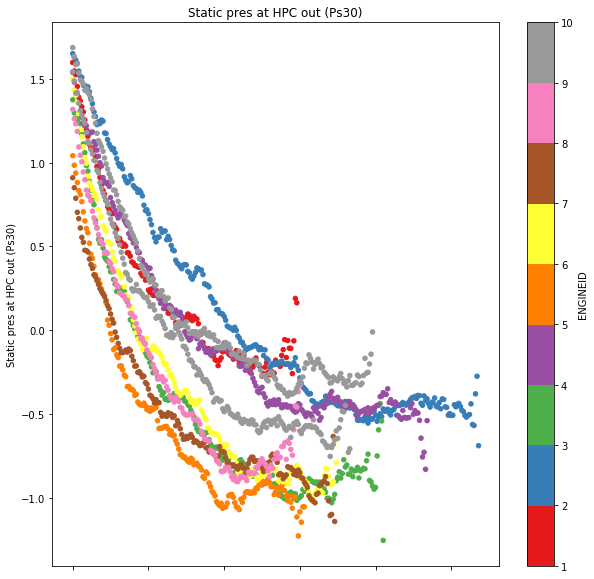

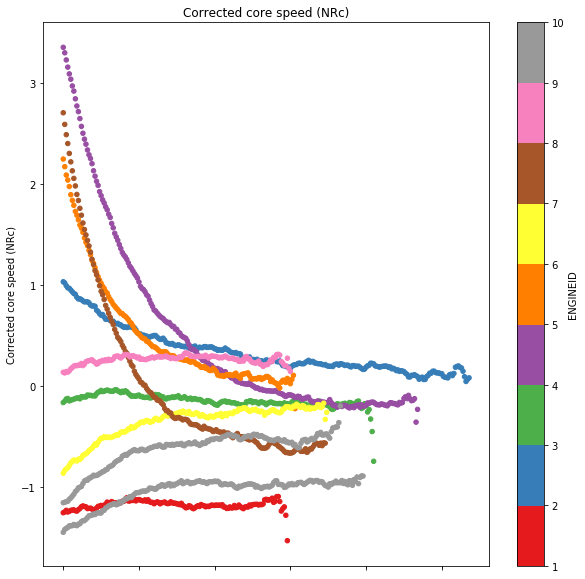

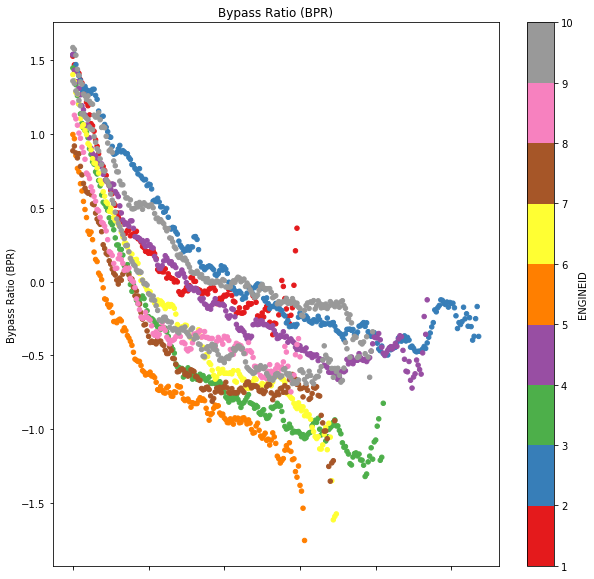

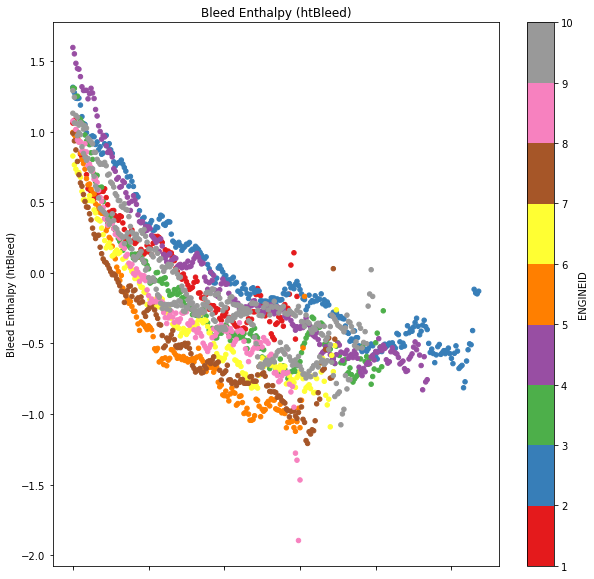

In [22]:
for col in config.select_feat:
    df.loc[df.ENGINEID < 11,:].plot(x='REV_TIMECYCLE', y=col, figsize=(10,10), title=col, c='ENGINEID', kind='scatter', cmap='Set1')

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


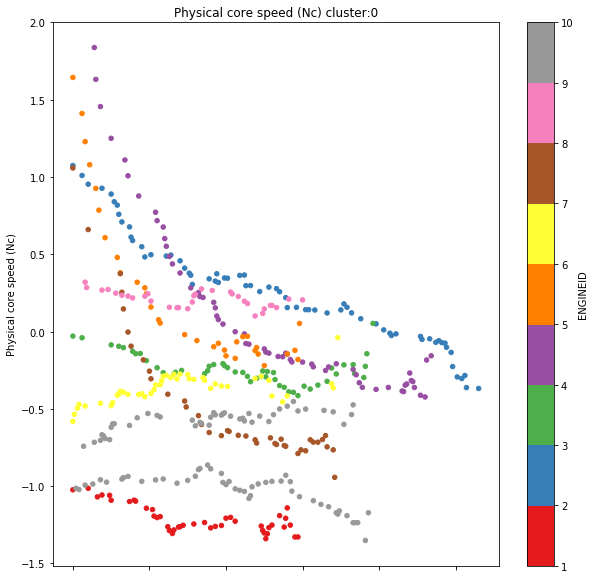

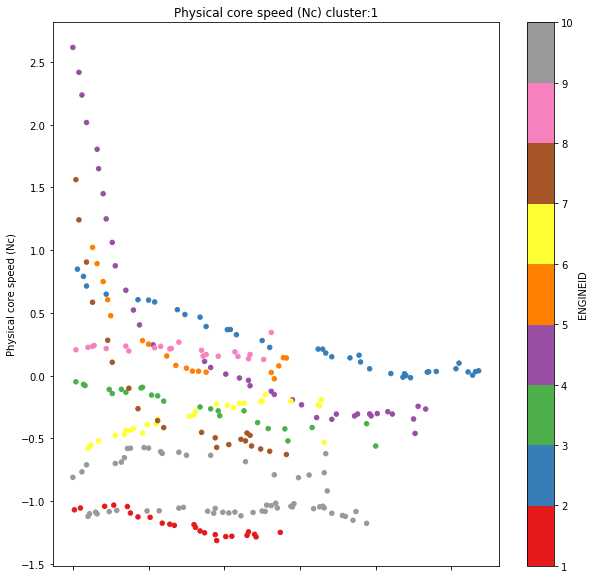

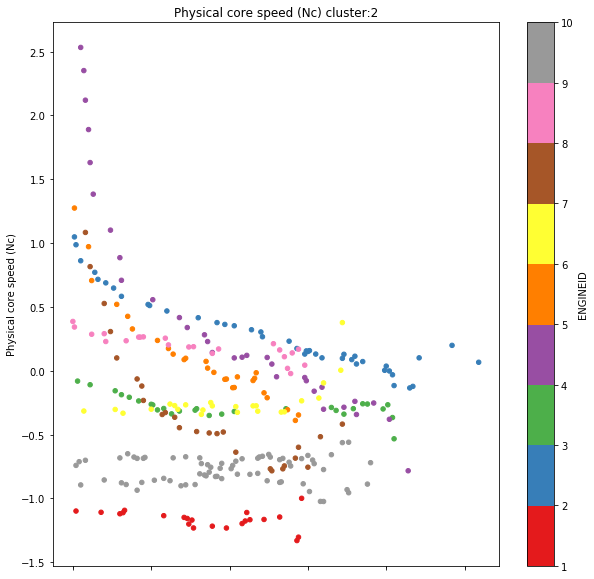

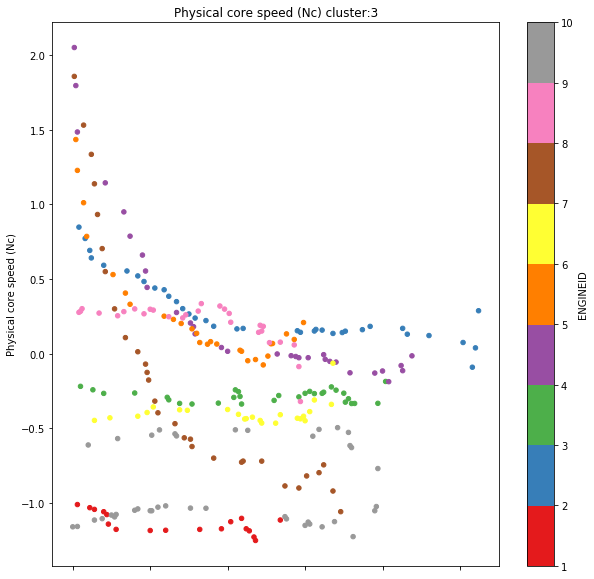

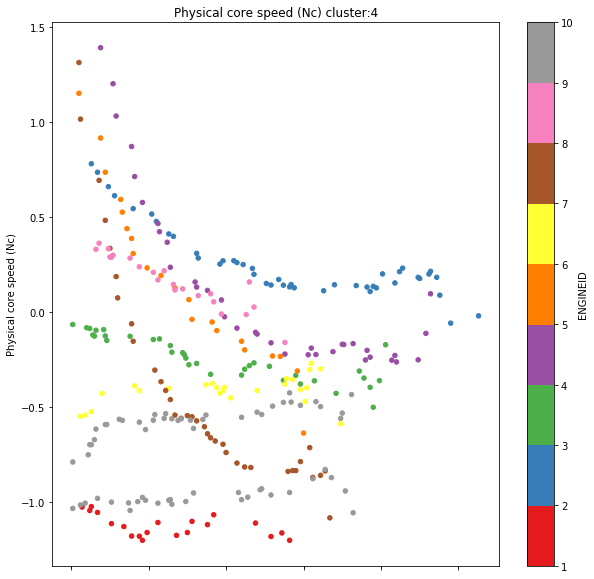

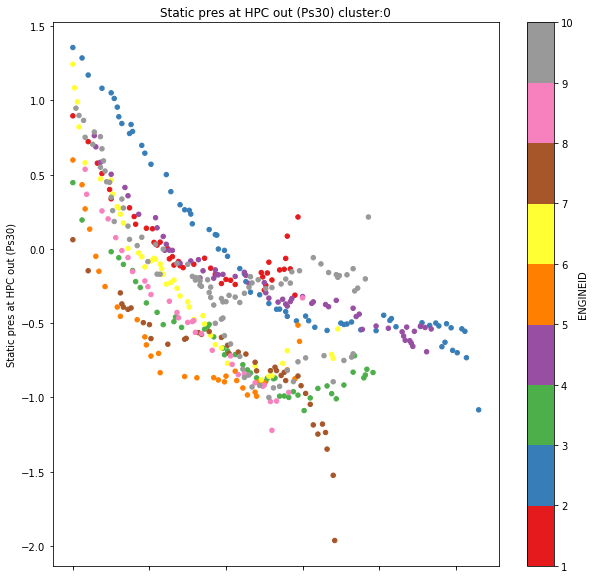

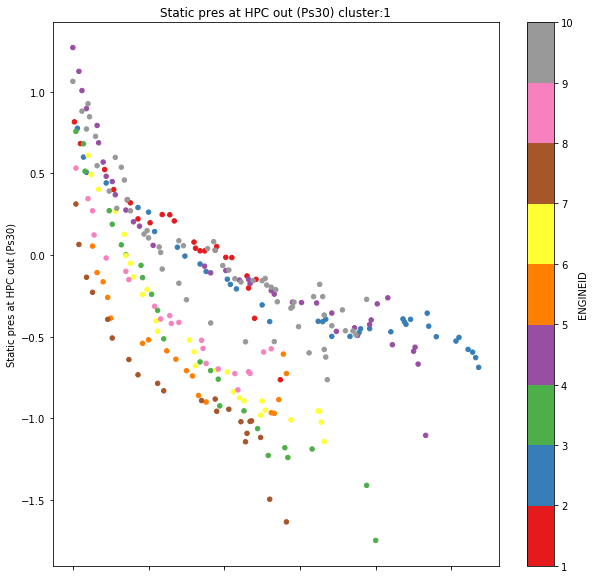

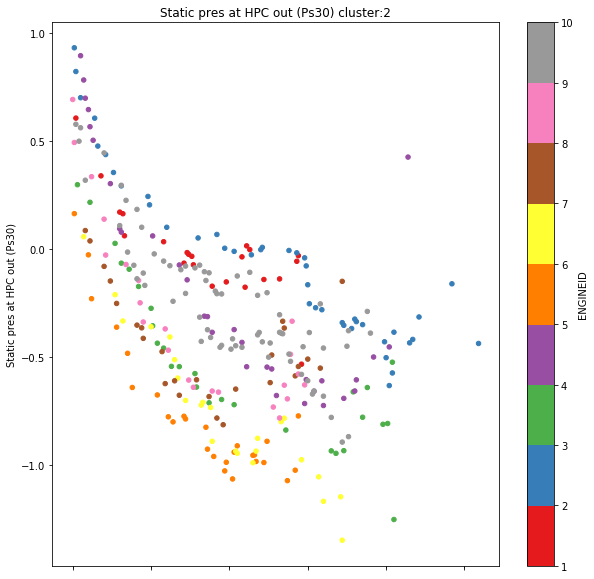

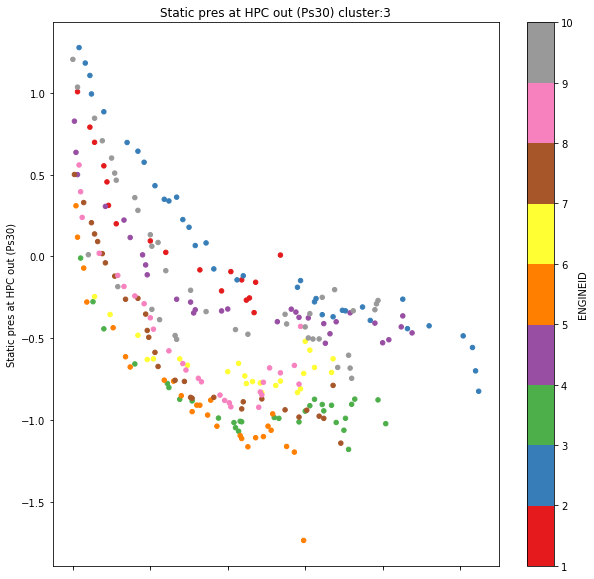

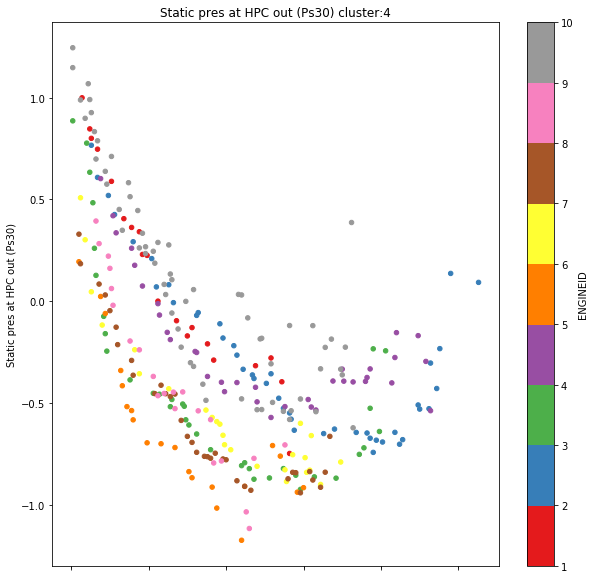

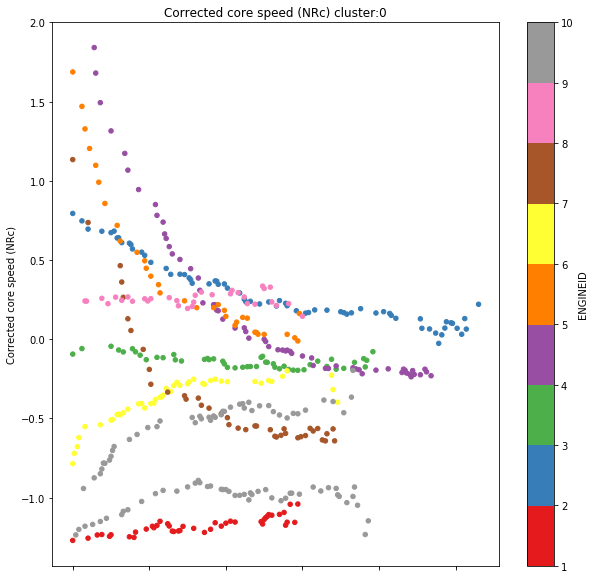

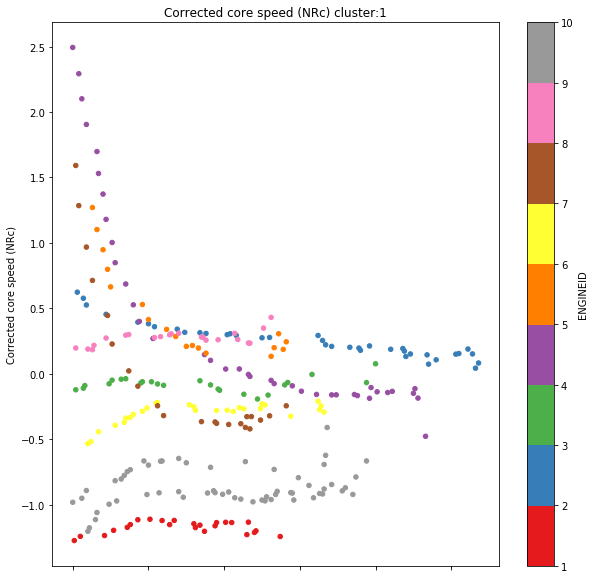

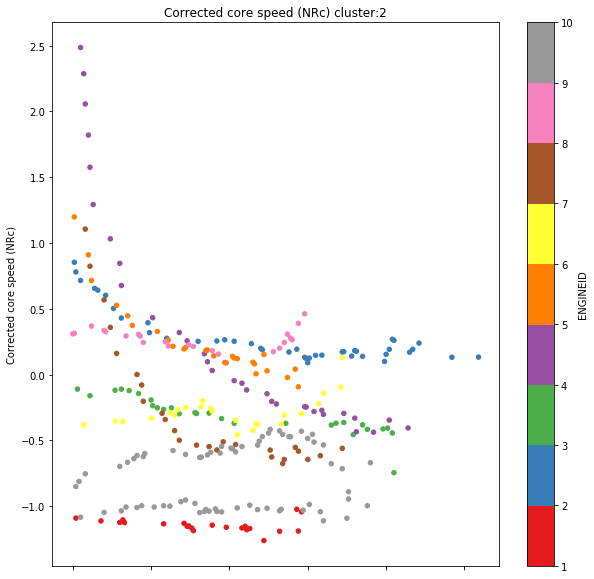

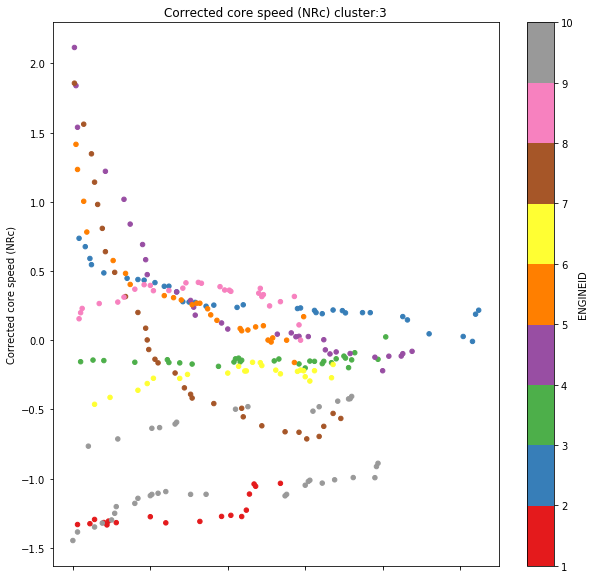

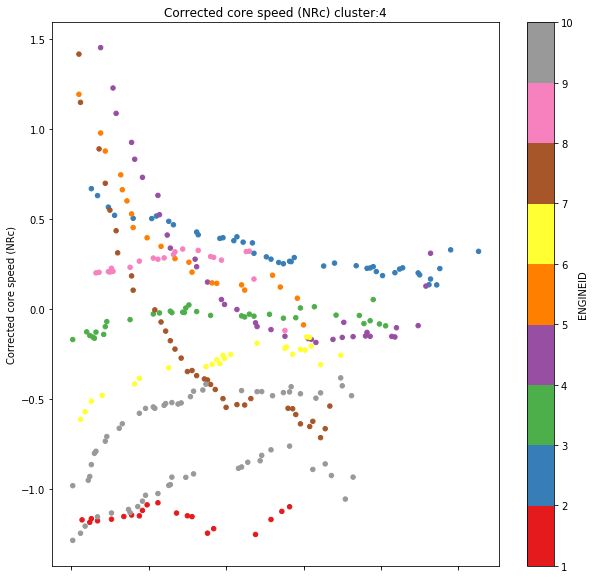

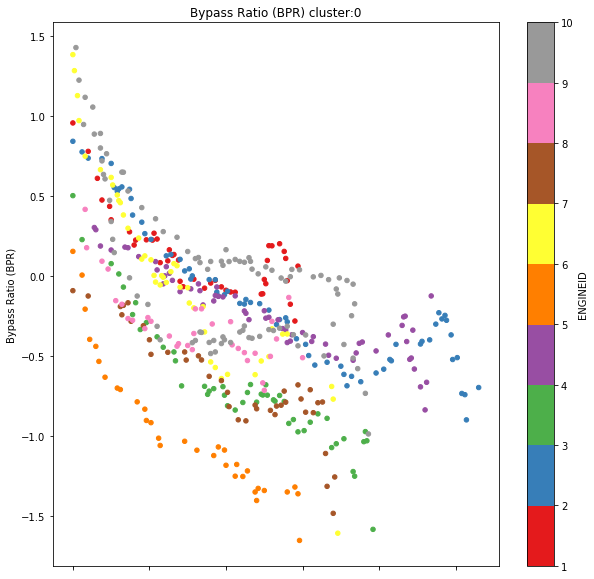

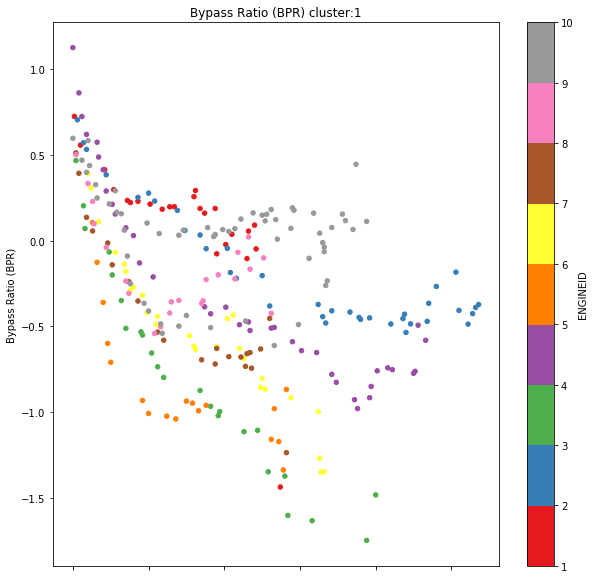

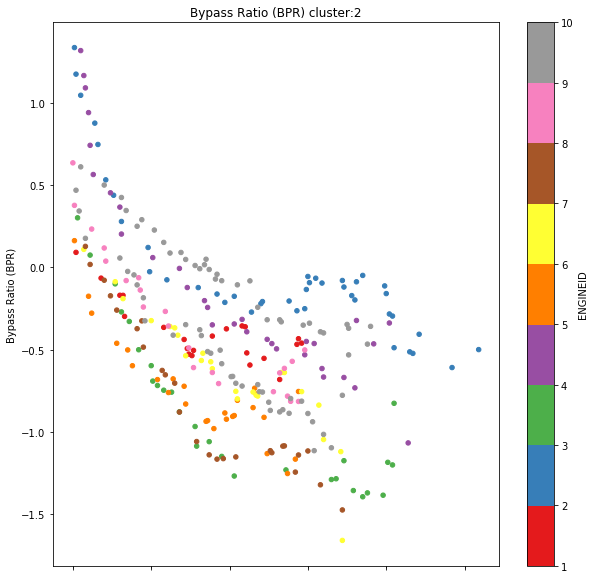

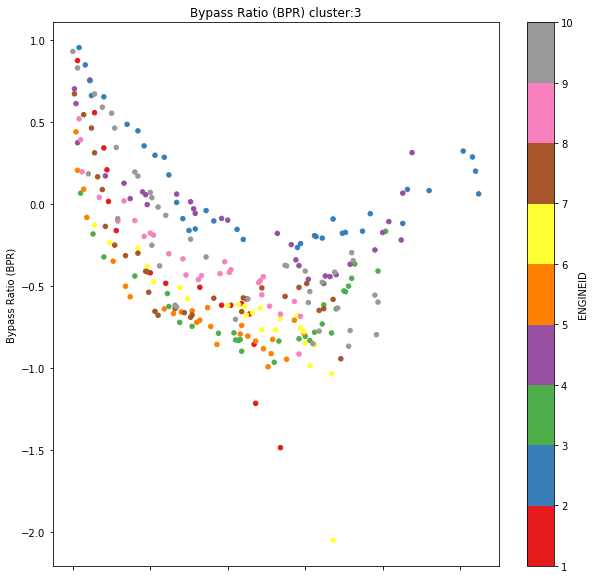

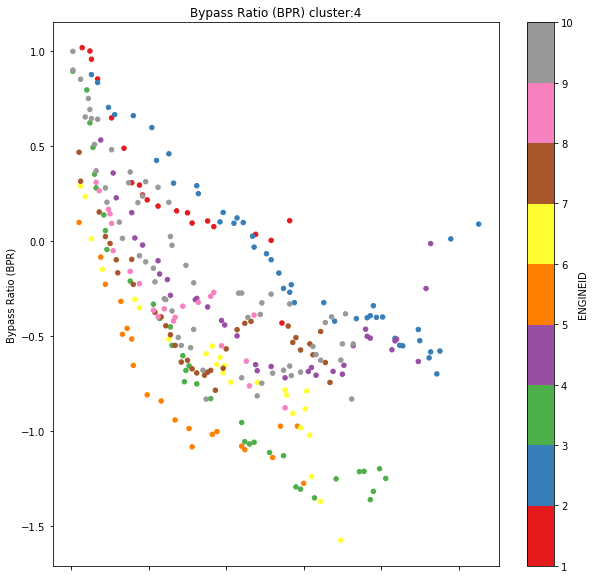

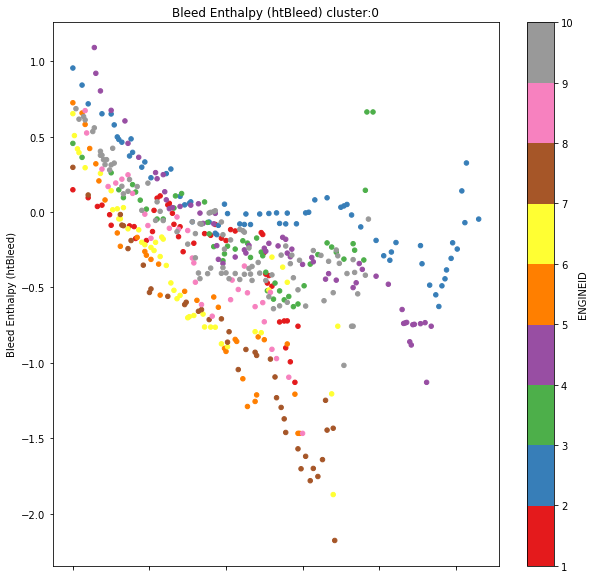

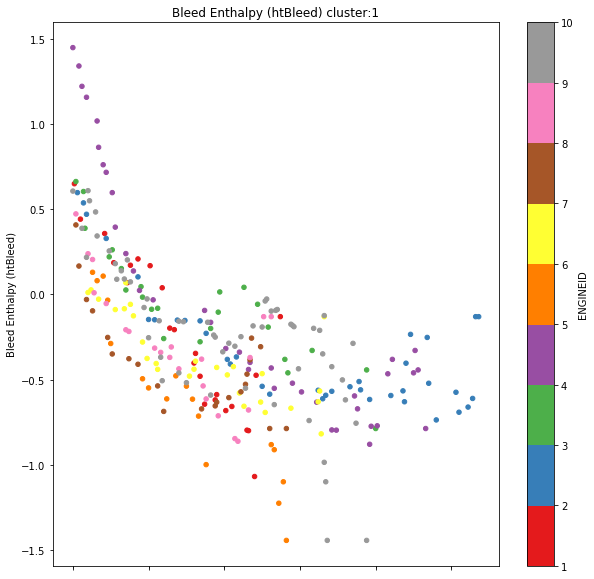

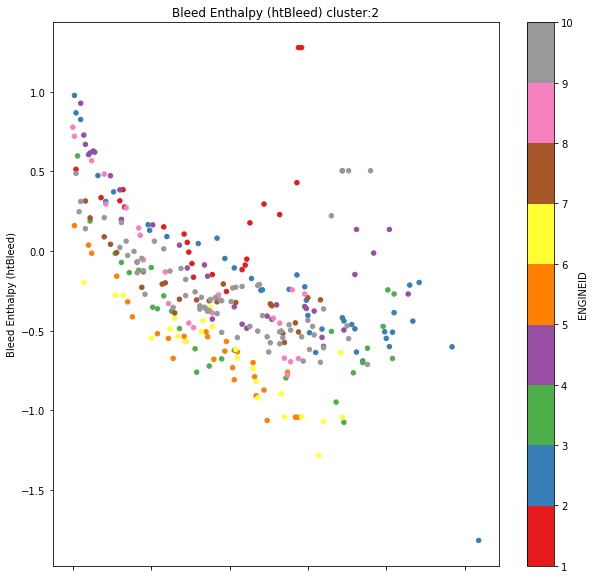

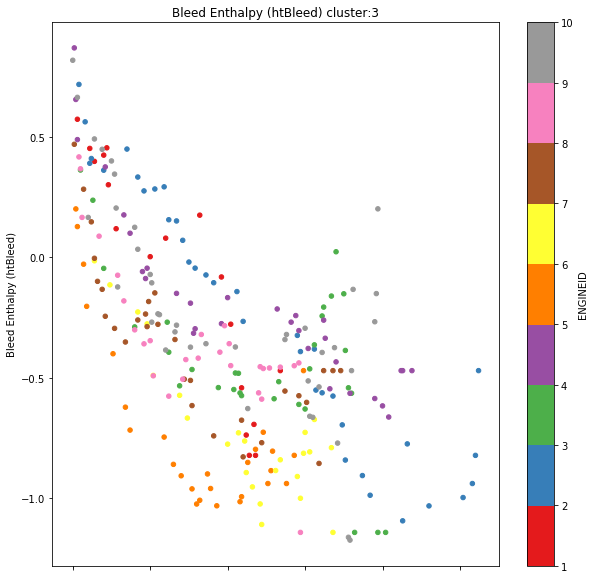

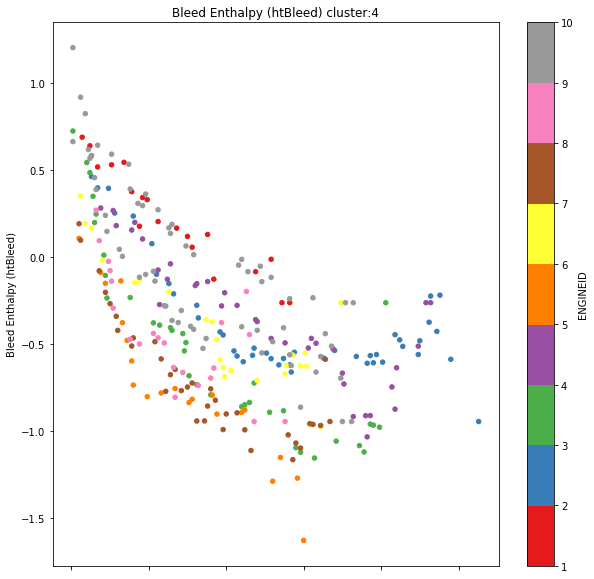

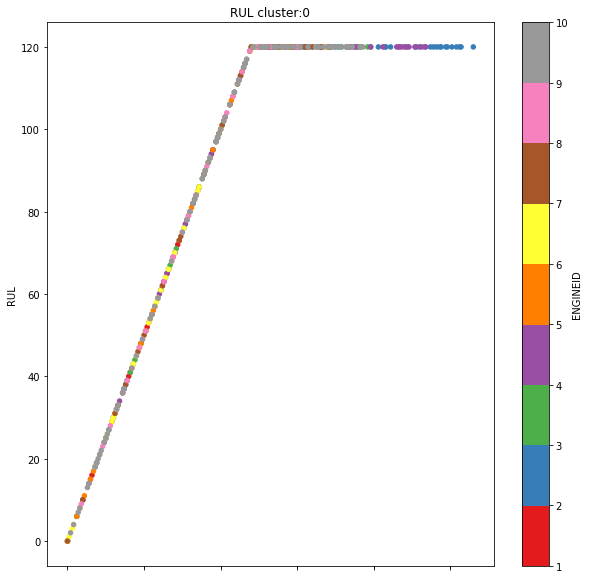

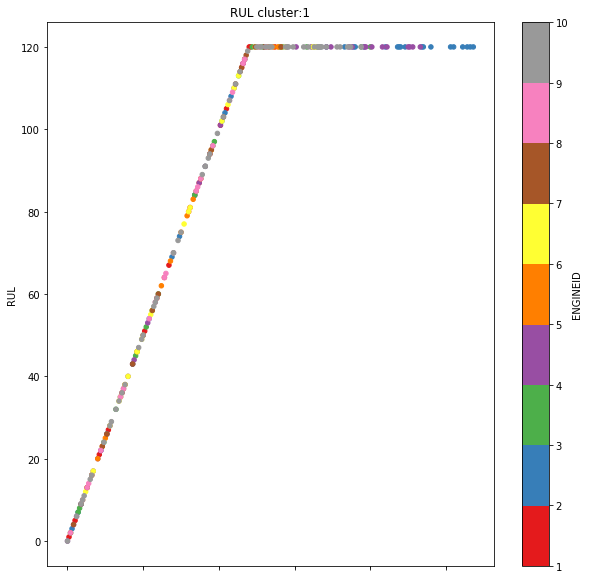

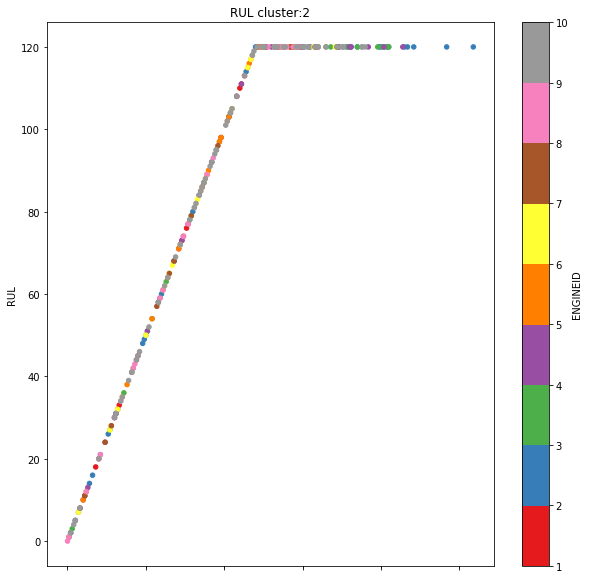

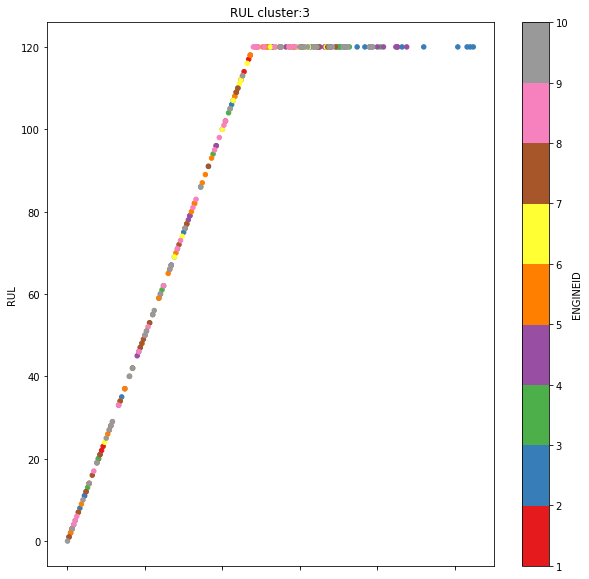

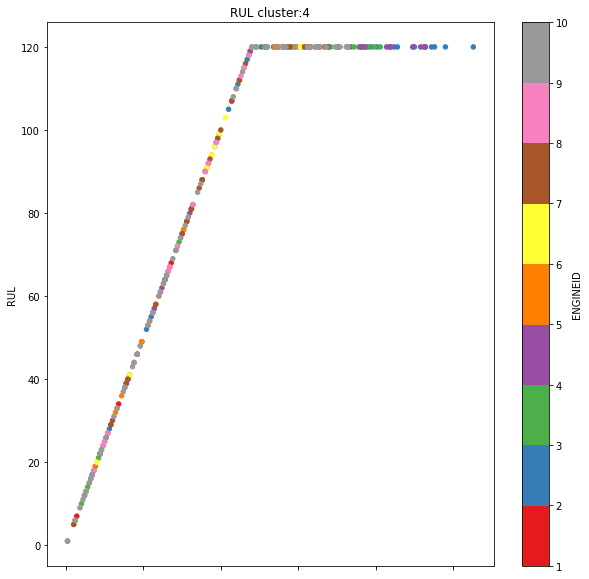

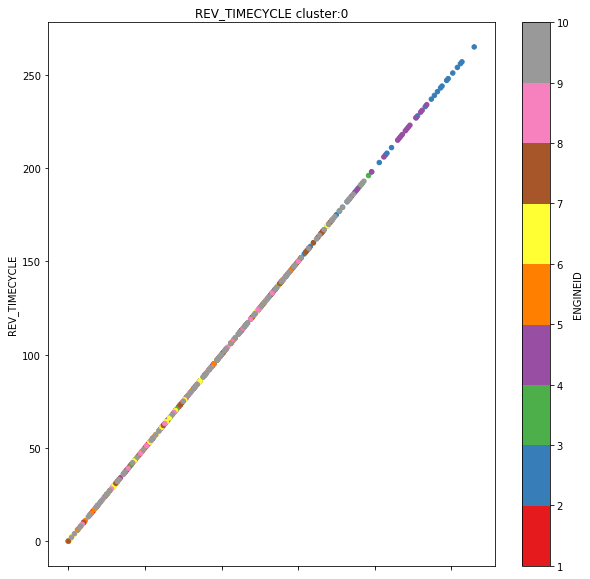

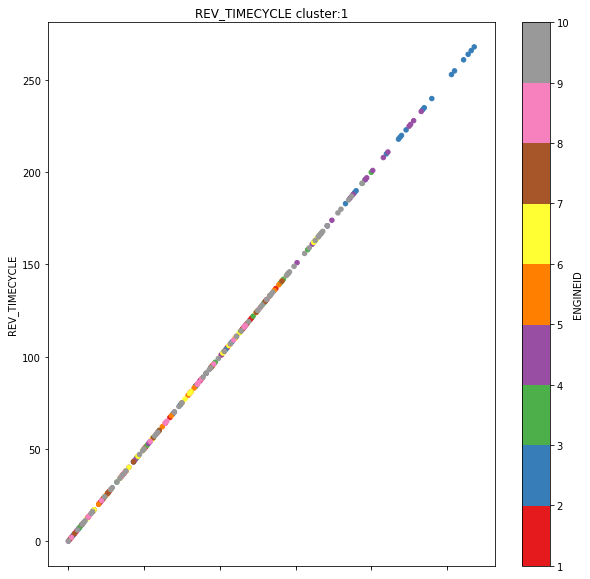

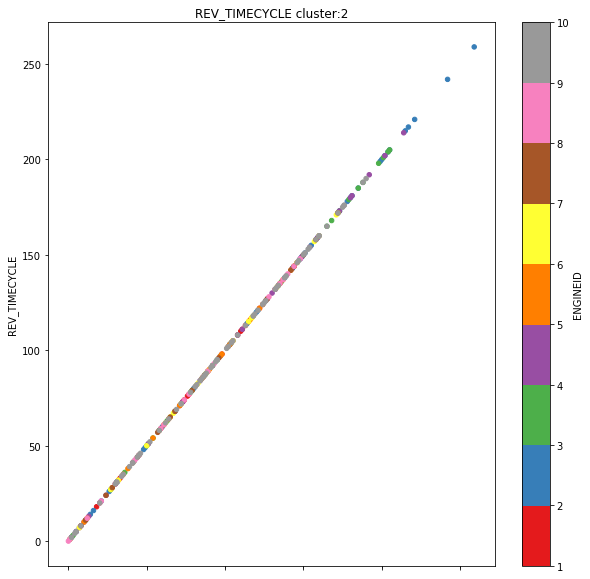

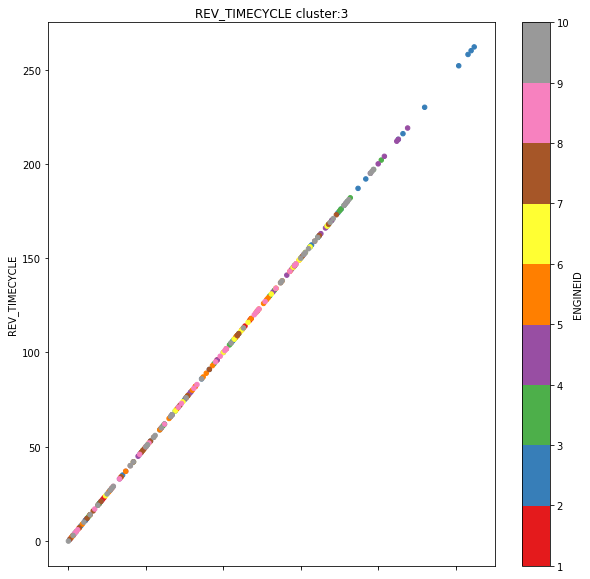

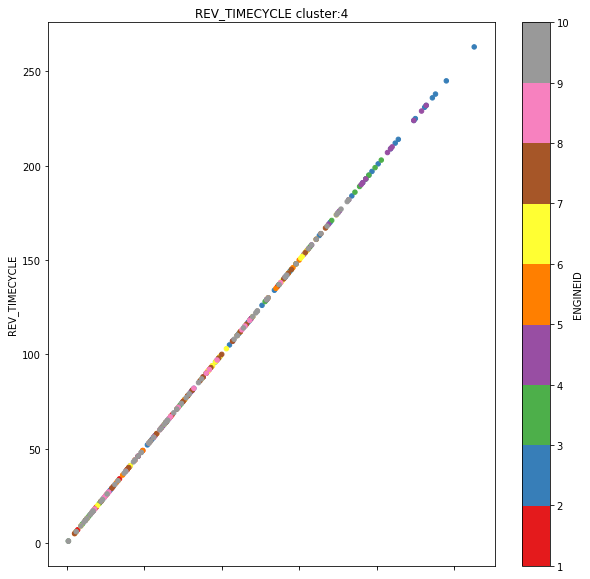

In [27]:
f = df.columns.values[7:]
for col in f:
    for cluster in range(5):
        df[df.CLUSTER==cluster].loc[df.ENGINEID < 11,:].plot(x='REV_TIMECYCLE', y=col, figsize=(10,10), title=col+" cluster:"+str(cluster), c='ENGINEID', kind='scatter', cmap='Set1')